In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_excel("Raisin_Dataset.xlsx")

label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

layer_sizes = [64, 32, 16, 8]

rbm_weights = []
rbm_biases = []

input_data = X_train_scaled.copy()

for size in layer_sizes:
    rbm = BernoulliRBM(n_components=size, learning_rate=0.01, batch_size=16, n_iter=20, random_state=42)
    rbm.fit(input_data)

    rbm_weights.append(rbm.components_.T)
    rbm_biases.append(rbm.intercept_hidden_)

    input_data = rbm.transform(input_data)


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=100,
                    batch_size=16)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6587 - loss: 0.6747 - val_accuracy: 0.7222 - val_loss: 0.6233
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.6196 - val_accuracy: 0.7704 - val_loss: 0.5715
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7831 - loss: 0.5707 - val_accuracy: 0.8111 - val_loss: 0.5100
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8332 - loss: 0.5028 - val_accuracy: 0.8481 - val_loss: 0.4472
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8544 - loss: 0.4347 - val_accuracy: 0.8333 - val_loss: 0.3998
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8514 - loss: 0.4129 - val_accuracy: 0.8667 - val_loss: 0.3827
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.3703 - val_accuracy: 0.8593 - val_loss: 0.3680
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8699 - loss: 0.3727 - val_accuracy: 0.8593 - v

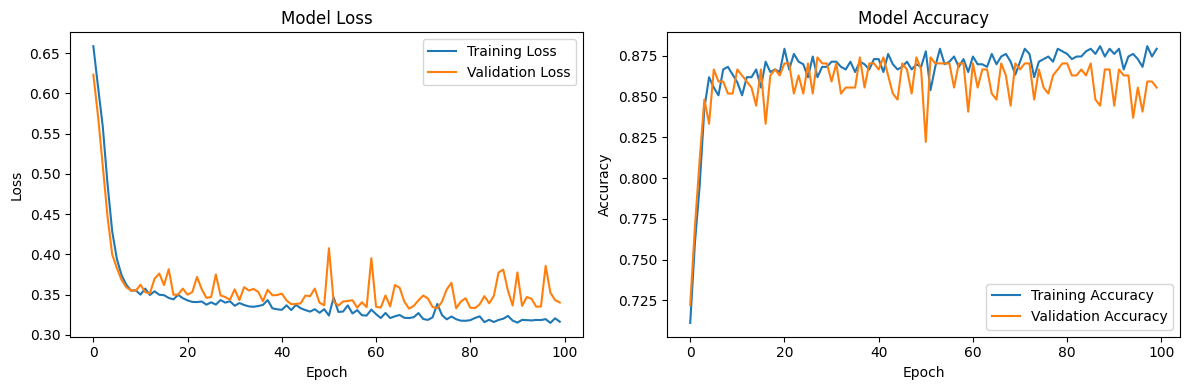

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(X_test), axis=-1)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       129
           1       0.86      0.87      0.86       141

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270

Confusion Matrix:
 [[109  20]
 [ 19 122]]
